<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

# AC SAF Level 2 - Case studies

AC SAF GOME-2 Level 2 data are helpful to track and monitor inputs to the atmosphere from various trace gases.

We investigate two case studies:
* [1) Case study - Amazonian fires and the spread of HCHO in August 2019](#amazon_fires)
* [2) Case study - Canada / US fires in August 2019](#us_fires)

<hr>

## <a ref="amazon_fires"></a>1) Case study -  Amazonian fires and the spread of HCHO in August 2019

Satellite data show the large input to atmosphere due to Amazonian fires. GOME-2 is capable to measure the total amount of `Formaldehyde (HCHO)` over a specific pixel. Nevertheless, since `HCHO` is concentrated close to surface, due to its volatility and reactivity, these observations are indicatives of the location and intensity of the sources.

`HCHO` is a precursor (e.g. serves as basis for multiple reactions including ones producing tropospheric ozone) and is considered harmful due to its toxicity and volatility.
`HCHO` is produced both by synthesis and natural reactions. 

[Biomass burning](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/1999GL900156) is considered to be a significant organic source of `HCHO`.

We can monitor Formaldehyde from GOME-2 instrument onboard Metop-B on August 19-20 2019 and observe the south-westerly spread of `HCHO`, which is driven by the Continental Low Level, a dominent feature during South-America's austral winter.

<br>

#### Load required libraries

In [64]:
import os
import h5py
import xarray as xr
import numpy as np

from matplotlib import pyplot as plt
import cartopy.crs as ccrs

In [12]:
os.chdir('/Users/julia_wagemann/Documents/github/ltpy/sample_data/level2_case_studies/2019_amazonas_fires/')

#### Helper function

In [37]:
def load_l2_data_xr(directory, parameter, longname, unit, name):
    fileList = os.listdir(directory)
    datasets = []

    for i in fileList:
        fullpath=os.path.join(directory, i)
        tmp = h5py.File(fullpath, 'r')
        groups =tmp.keys()
        tmp['TOTAL_COLUMNS/']
        latitude = tmp['GEOLOCATION/LatitudeCentre']
        longitude = tmp['GEOLOCATION/LongitudeCentre']
        param = tmp['TOTAL_COLUMNS/'+parameter]
        da_tmp = xr.DataArray(
            param.value,
            dims=('ground_pixel'),
            coords={
                'latitude': ('ground_pixel', latitude[:]),
                'longitude': ('ground_pixel', longitude[:])
            },
            attrs={'long_name': longname, 'units': unit},
            name=name
        )
        datasets.append(da_tmp)

    return xr.concat(datasets, dim='ground_pixel')

In [40]:
def visualize_gome_l2(xr_dataarray, projection):
    fig, ax = plt.subplots(figsize=(40, 10))
    ax = plt.axes(projection=projection)

    ax.coastlines()
    ax.set_global()

    # set gridlines
    ax.gridlines()

    # plot O3 pixel positions
    ax.scatter(
        xr_dataarray.longitude.data,
        xr_dataarray.latitude.data,
        c=xr_dataarray.data*1e-15,
        cmap=plt.cm.get_cmap('gist_rainbow_r'),
        marker='o',
        s=0.5,
        transform=ccrs.PlateCarree()
    )

    ax.set_title(r'Data position of vertical column density of NO$_2$')
    plt.show()

<hr>

### 1) Load Level 2 `HCHO` data for 18 August 2019

In [65]:
directory= './gome2b/20190818/'
parameter='HCHO'
longname='Vertical column density of HCHO'
unit='mol/cm2'
name='vertical_column_HCHO'

hcho_da = load_l2_data_xr(directory,parameter,longname,unit,name)
#hcho_da[hcho_da <0] = 0
#hcho_da.max()*1e-16

<xarray.DataArray 'vertical_column_HCHO' ()>
array(41.772051)

<br>

## 2) Plot Level 2 `HCHO` data

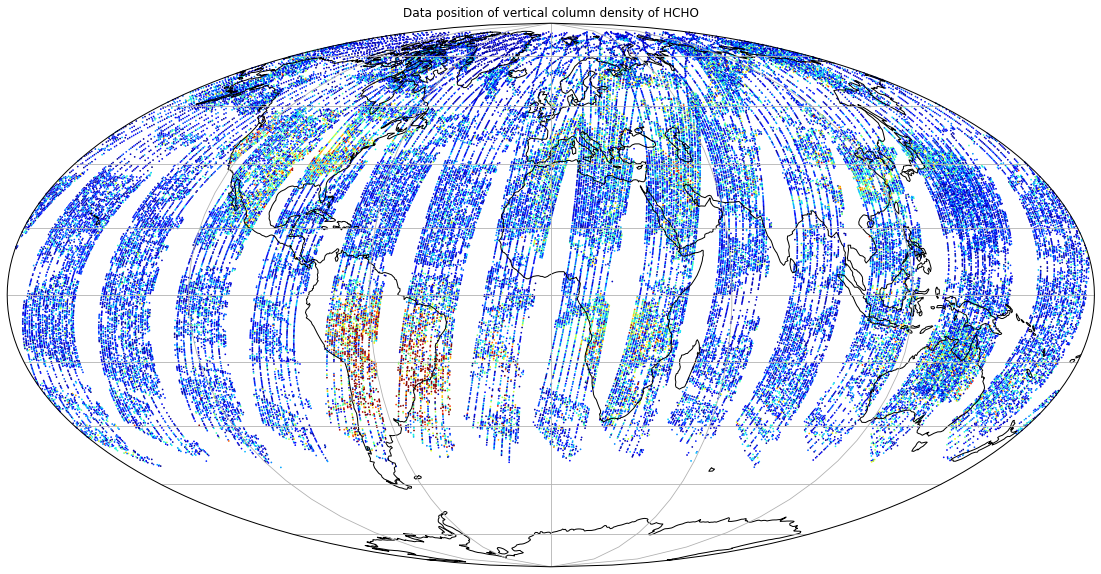

In [72]:
fig, ax = plt.subplots(figsize=(40, 10))
ax = plt.axes(projection=ccrs.Mollweide())

ax.coastlines()
ax.set_global()

    # set gridlines
ax.gridlines()

    # plot O3 pixel positions
ax.scatter(
    hcho_da.longitude.data,
    hcho_da.latitude.data,
    c=hcho_da.data*1e-16,
    cmap=plt.cm.get_cmap('jet'),
    marker='o',
    vmin=0,
    vmax=5,
    s=0.5,
    transform=ccrs.PlateCarree()
    )

ax.set_title(r'Data position of vertical column density of HCHO')
plt.show()

<br>

## <a ref="us_fires"></a>2) Case study - Canada / US fires in August 2018

TO DO

<hr>

<p style="text-align:left;"><a href="https://gitlab.eumetsat.int/eo-lab/training-atmospheric-composition/blob/master/LICENSE">&copy; Copyright 2019 eo-lab</a> <span style="float:right;">View on GitLab | Cite | Contact</span></p>